# How is wage influenced by gender? 2013 American Community Survey

__Below I update an old analysis done in RMarkdown to Notebooks. I use as source data from 2013 American Community Survey__ 

In an exploratory examination on income, I noticed a clear tendency for lower values in women compared to men.
Here I want to explore the differences in wage between man and women and which are the parameters that reduce or amplify this difference.


## Index


[Set Up](#SetUp)

[1. How does gender influence income distribution](#1.-How-does-gender-influence-income-distribution?)

[2. What is the influence of educational attaiment?](#2.-What-is-the-influence-of-Educational-Attainment?)

[3. What about marital status?](#3.-What-about-Marital-Status?)

[4. Examining Wage by work type](#4.-Examining-Wage-by-Work-Type)

[5. Examining Wage by Gender and Ethnicity](#5.-Examining-Wage-by-Gender-and-Ethnicity)

[6. Does the gap change with age?](#6.-Does-the-gap-change-with-age?)



## SetUp

**Population A and B upload and selection of variables of interest**

I eliminate records having wage lower than 1000, or age higher than 75. I also recode factors for the variables I have selected. 


In [1]:
library(readr)
library(RColorBrewer)
library(ggplot2)
library(maps)

Pop <- rbind(read_csv("../input/2013-american-community-survey/ss13pusa.csv")[,c('WAGP','COW','SEX','MAR', 'NATIVITY', 'RAC1P', 'AGEP','ST', 'SCHL')], 
read_csv("../input/2013-american-community-survey/ss13pusb.csv")[,c('WAGP','COW','SEX','MAR', 'NATIVITY', 'RAC1P', 'AGEP','ST', 'SCHL')])
Pop$WAGP <- as.numeric(as.character(Pop$WAGP))
PopSel <- subset(Pop, Pop$WAGP >= 1000 & Pop$AGEP < 76)
rm(Pop)
gc()
PopSel$SCHL <- as.numeric(as.character(PopSel$SCHL))
PopSel$SEX <- as.factor(as.character(PopSel$SEX))
PopSel$MAR <- as.factor(as.character(PopSel$MAR))
PopSel$NATIVITY <- as.factor(as.character(PopSel$NATIVITY))
PopSel$RAC1P <- as.factor(as.character(PopSel$RAC1P))
#PopSel$COW <- as.factor(as.character(PopSel$COW))
PopSel$ST <- as.factor(as.character(PopSel$ST))
#subset(PopSel, PopSel$COW==8)[1:100,]a

Parsed with column specification:
cols(
  .default = col_double(),
  RT = col_character(),
  SPORDER = col_character(),
  PUMA = col_character(),
  ST = col_character(),
  PWGTP = col_character(),
  AGEP = col_character(),
  INTP = col_character(),
  JWMNP = col_character(),
  JWRIP = col_character(),
  JWTR = col_character(),
  OIP = col_character(),
  PAP = col_character(),
  RELP = col_character(),
  RETP = col_character(),
  SCHG = col_character(),
  SCHL = col_character(),
  SEMP = col_character(),
  SSIP = col_character(),
  SSP = col_character(),
  WAGP = col_character()
  # ... with 100 more columns
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  RT = col_character(),
  SPORDER = col_character(),
  PUMA = col_character(),
  PWGTP = col_character(),
  AGEP = col_character(),
  INTP = col_character(),
  JWMNP = col_character(),
  JWRIP = col_character(),
  JWTR = col_character(),
  OIP = col_character(),
  PAP

used      (Mb)  gc trigger (Mb)   max used  (Mb)  
Ncells    864380  46.2   1682835    89.9   1221451   65.3
Vcells 104891573 800.3 487660968  3720.6 608862200 4645.3

## 1. How does gender influence income distribution?

I have a first look on  how gender influences wage distribution by overlapping the density plots
for males and females. For representation purposes, the wage is shown in a log10 scale.

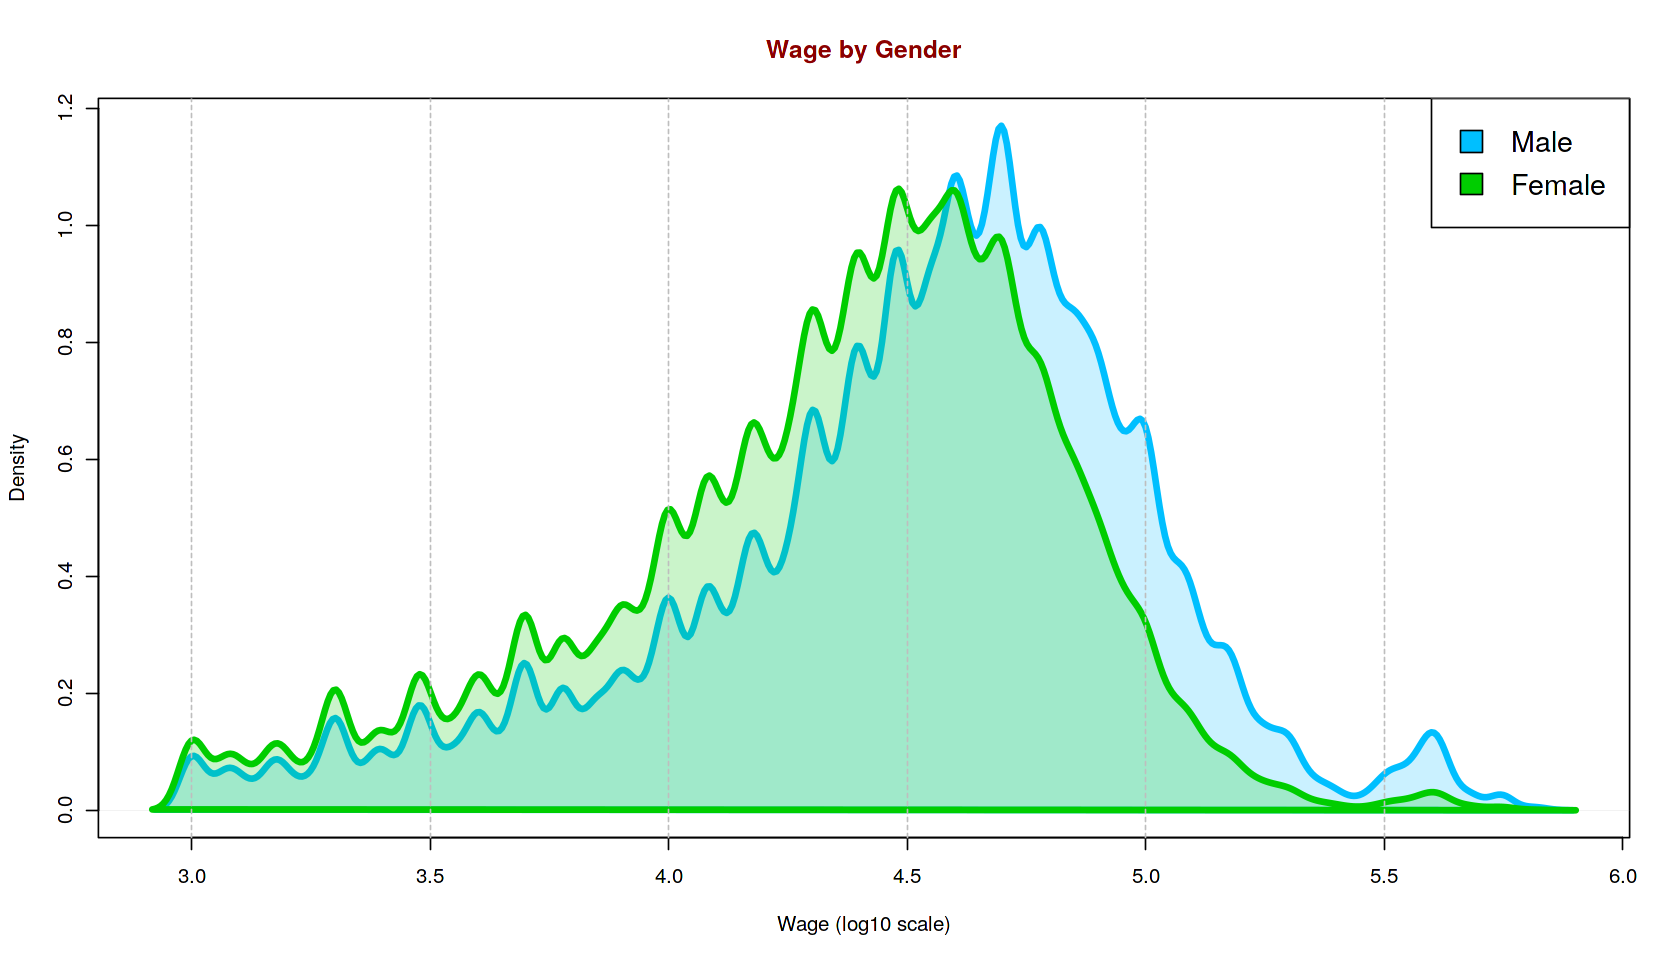

In [2]:
options(repr.plot.width=14, repr.plot.height=8)

dMale <- density(log10(PopSel[PopSel$SEX==1,]$WAGP))
dFemale <- density(log10(PopSel[PopSel$SEX==2,]$WAGP))
plot(dMale, main='Wage by Gender', col.main="darkred", xlab="Wage (log10 scale)", cex=1.1)
polygon(dMale, col= "#00BFFF35", border="#00BFFF", lwd=4)
polygon(dFemale, col= "#00CD0035", border="#00CD00",lwd=4)
abline(v=seq(3,5.5, by=0.5), col='grey', lty=2)
legend("topright", legend=c("Male", "Female"), fill=c("#00BFFF", "#00CD00"), cex=1.4, bg="white")

## 2. What is the influence of Education Attainment? 

I stratify the population according to education, considering the following classes: people below 4th grade,  people that have completed the 4th grade (but not having a high school diploma), people that have obtained a high school diploma, an associate degree, a bachelor degree, a master degree, a professional degree or a PhD.
I then calculate the median wage in men and women for the education categories. Median value in women is expressed also as percentage of median valus in mes, as above.

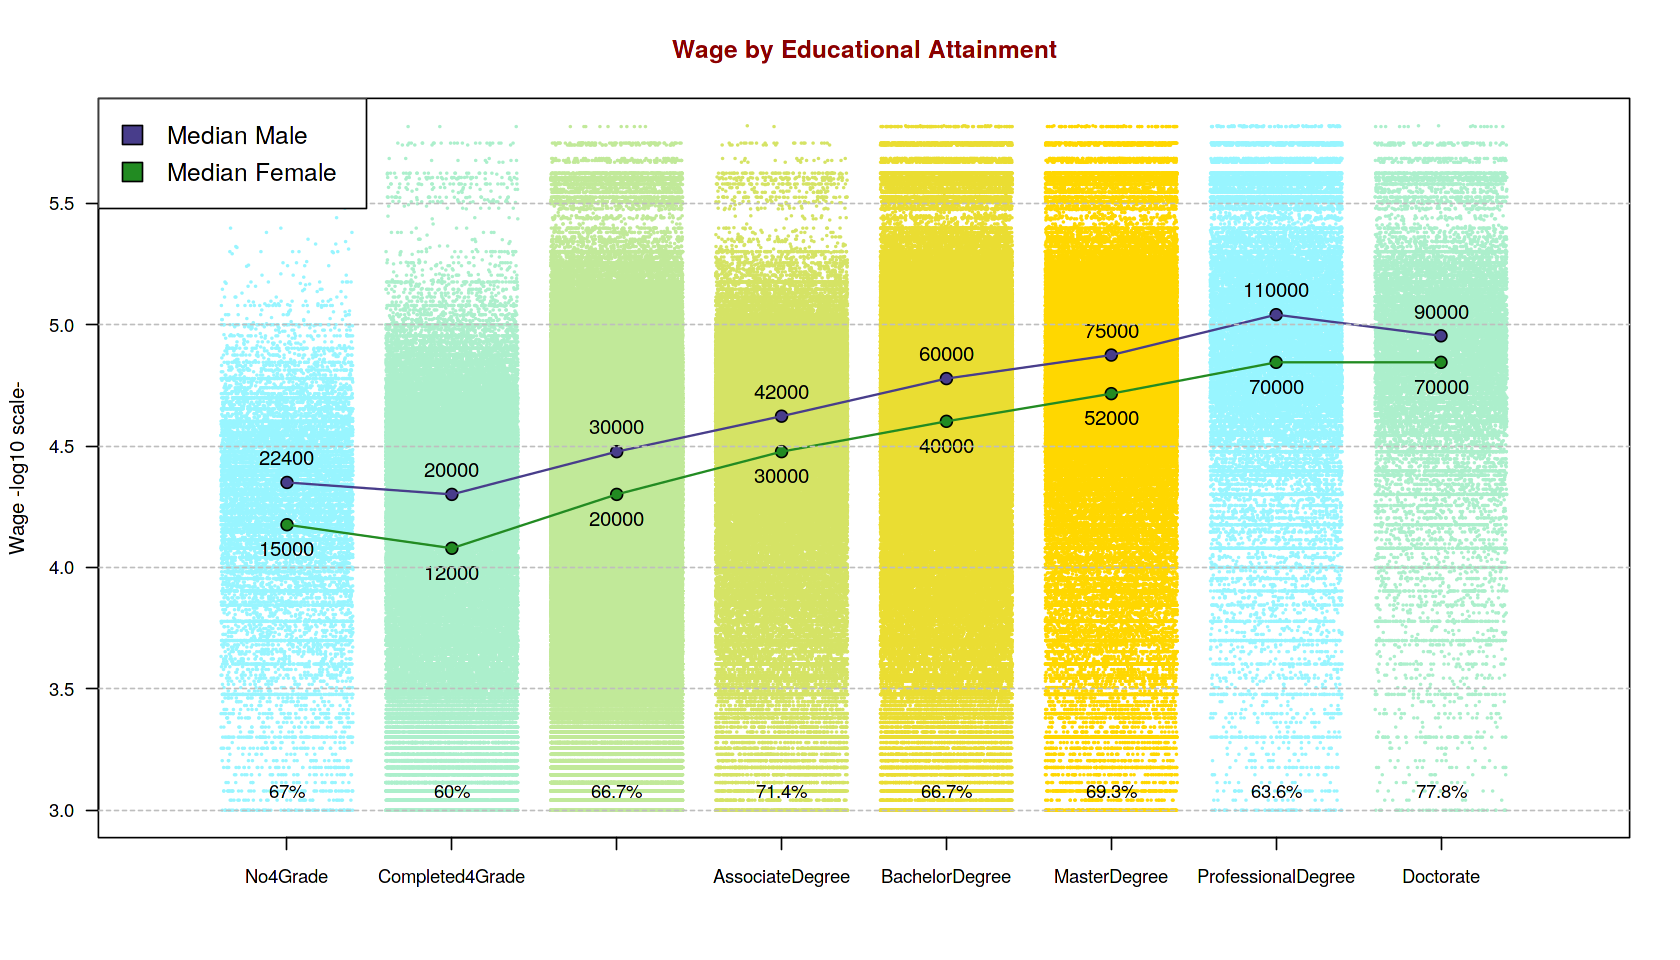

In [3]:
# summary(as.numeric(as.character(PopSel$SCHL)))
PopSel$ED <- ifelse(PopSel$SCHL < 7, 'No4Grade', ifelse(PopSel$SCHL >=7 & PopSel$SCHL<16, 'Completed4Grade',
ifelse (PopSel$SCHL >=16 & PopSel$SCHL<20,'HighSchoolDiploma', ifelse(PopSel$SCHL == 20, 'AssociateDegree', 
ifelse(PopSel$SCHL == 21, 'BachelorDegree', ifelse(PopSel$SCHL == 22, 'MasterDegree', ifelse(PopSel$SCHL == 23, 'ProfessionalDegree', 
ifelse(PopSel$SCHL == 24, 'Doctorate', PopSel$SCHL))))))))
#table(PopSel$SCHL)
PopSel$ED <- factor(PopSel$ED, c('No4Grade', 'Completed4Grade', 'HighSchoolDiploma', 'AssociateDegree', 
'BachelorDegree', 'MasterDegree', 'ProfessionalDegree', 'Doctorate'))

WageEdMedianMen <- tapply(PopSel[PopSel$SEX==1,]$WAGP, PopSel[PopSel$SEX==1,]$ED, median)
WageEdMedianWomen <- tapply(PopSel[PopSel$SEX==2,]$WAGP, PopSel[PopSel$SEX==2,]$ED, median)

stripchart(log10(PopSel$WAGP) ~PopSel$ED, col=colorRampPalette(c('cadetblue1','gold'))(6),main = 'Wage by Educational Attainment', 
col.main='darkred', pch=19, cex=0.1, method='jitter', jitter=0.4, vertical=T,  las=1, 
ylab='Wage -log10 scale-', cex.axis=0.9)

points(log10(WageEdMedianMen)  ~ seq(1,8), bg='darkslateblue', pch=21, cex=1.2)
points(log10(WageEdMedianWomen)  ~ seq(1,8), bg='forestgreen', pch=21, cex=1.2)
lines(log10(WageEdMedianMen)  ~ seq(1,8), col='darkslateblue', lwd=1.4)
lines(log10(WageEdMedianWomen)  ~ seq(1,8),col='forestgreen', lwd=1.4)
text(log10(WageEdMedianWomen)-0.1  ~ seq(1,8), label=WageEdMedianWomen)
text(log10(WageEdMedianMen)+0.1  ~ seq(1,8), label=WageEdMedianMen)

text(rep(log10(1200), 8)  ~ seq(1,8), 
label= paste(round(WageEdMedianWomen/WageEdMedianMen*100, 1), '%', sep=''), cex=0.9)

abline(h=seq(3,6,by=0.5), col='grey', lty=2)
legend("topleft", legend=c("Median Male", "Median Female"), 
fill=c("darkslateblue", "forestgreen"), cex=1.2, bg="white")

## 3. What about Marital Status?

I stratify the population according to the marital status and represent data points in a stripchart.
I then calculate the median wage in men and women in each category. The relationship between the two median values in each category
is also reported in the plot as percentage (median women / median men * 100)*

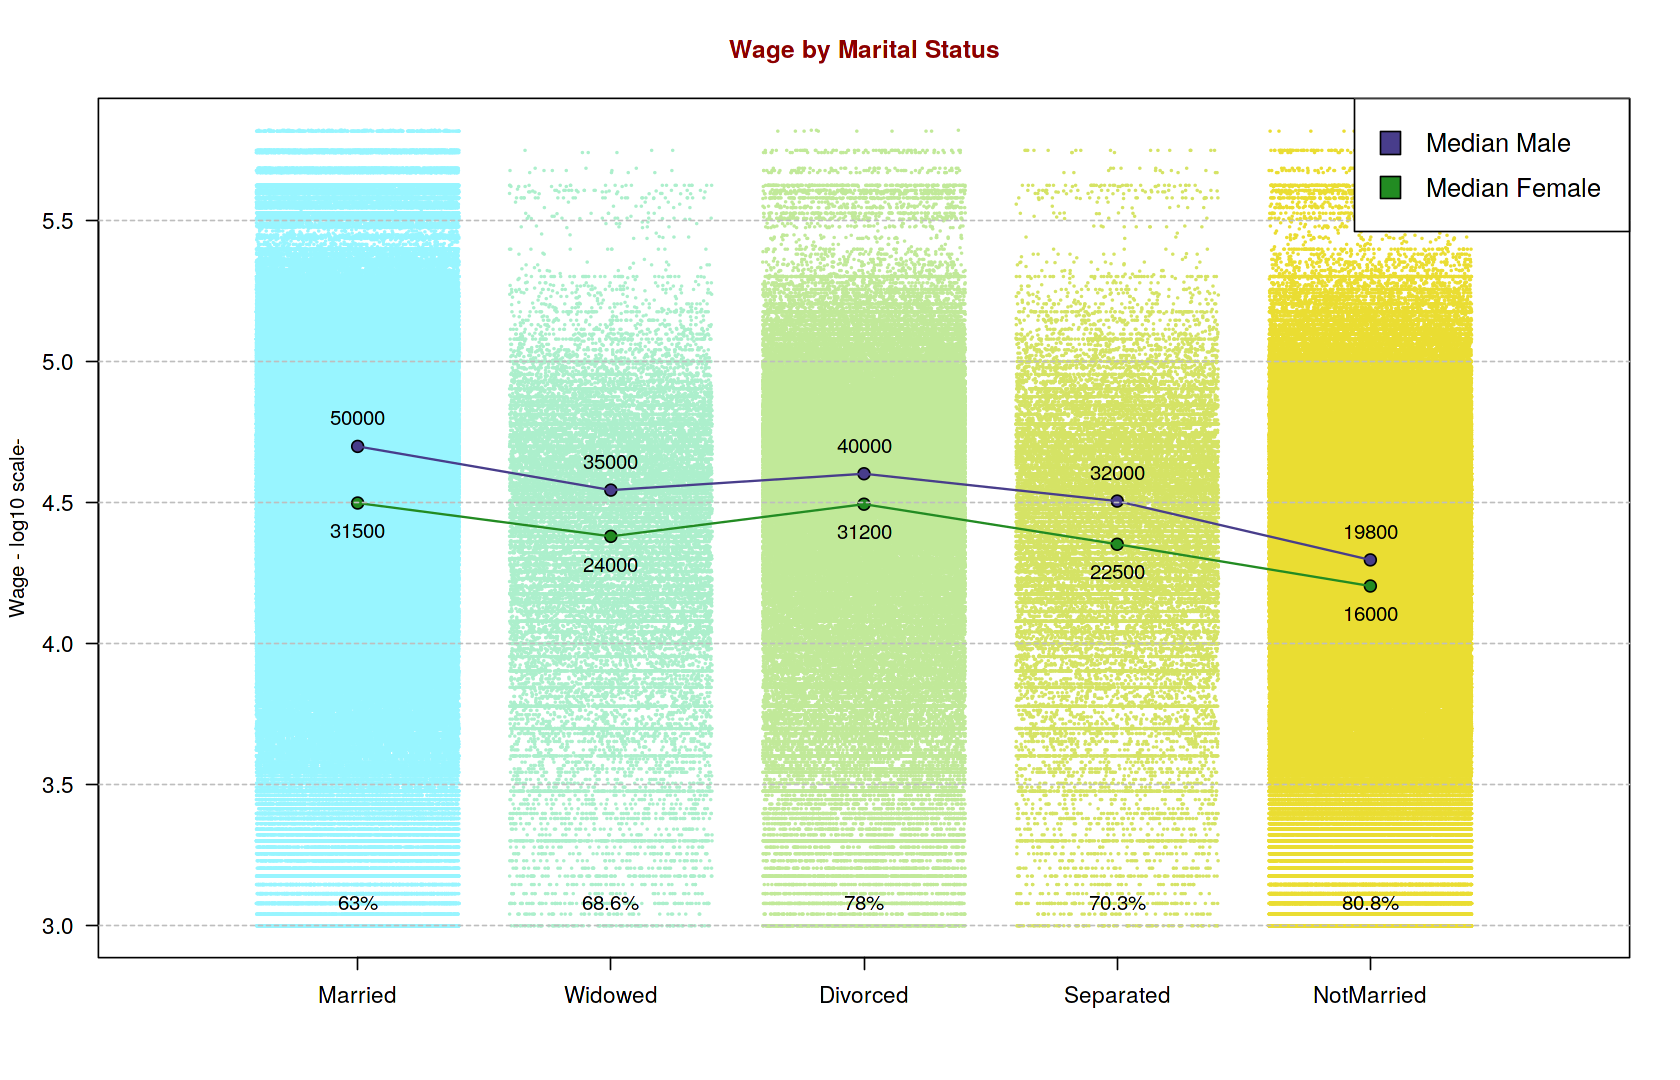

In [4]:
WageMarMedianMen <- tapply(PopSel[PopSel$SEX==1,]$WAGP, factor(PopSel[PopSel$SEX==1,]$MAR), median)
WageMarMedianWomen <- tapply(PopSel[PopSel$SEX==2,]$WAGP, factor(PopSel[PopSel$SEX==2,]$MAR), median)

options(repr.plot.width=14, repr.plot.height=9)

stripchart(log10(PopSel$WAGP) ~PopSel$MAR, col=colorRampPalette(c('cadetblue1','gold'))(6),
main = 'Wage by Marital Status', col.main='darkred', pch=19, cex=0.1, method='jitter', 
jitter=0.4, vertical=T, group.names=c('Married','Widowed', 'Divorced','Separated', 'NotMarried'), 
las=1, ylab= 'Wage - log10 scale-',cex.axis=1.1)

points(log10(WageMarMedianMen)  ~ as.numeric(as.character(names(WageMarMedianMen))), bg='darkslateblue', 
pch=21, cex=1.2, ylab = 'Wages - log10 scale-', cex.lab=0.8)
points(log10(WageMarMedianWomen)  ~ as.numeric(as.character(names(WageMarMedianWomen))), 
bg='forestgreen', pch=21, cex=1.2)
lines(log10(WageMarMedianMen)  ~ as.numeric(as.character(names(WageMarMedianMen))), col='darkslateblue', lwd=1.4)
lines(log10(WageMarMedianWomen)  ~ as.numeric(as.character(names(WageMarMedianWomen))),col='forestgreen', lwd=1.4)
text(log10(WageMarMedianWomen)-0.1  ~ as.numeric(as.character(names(WageMarMedianWomen))), label=WageMarMedianWomen)
text(log10(WageMarMedianMen)+0.1  ~ as.numeric(as.character(names(WageMarMedianMen))), label=WageMarMedianMen)

text(rep(log10(1200), 5)  ~ as.numeric(as.character(names(WageMarMedianMen))), 
label= paste(round(WageMarMedianWomen/WageMarMedianMen*100, 1), '%', sep=''))

abline(h=seq(3,6,by=0.5), col='grey', lty=2)
legend("topright", legend=c("Median Male", "Median Female"), cex=1.25, 
fill=c("darkslateblue", "forestgreen"), bg="white")


## 4. Examining Wage by Work Type

From COW field I extract the following categories of workers: employees for private profit companies, employees for private non-profit companies, local government, state government or federal government employees.
I then calculate the median wage in men and women.

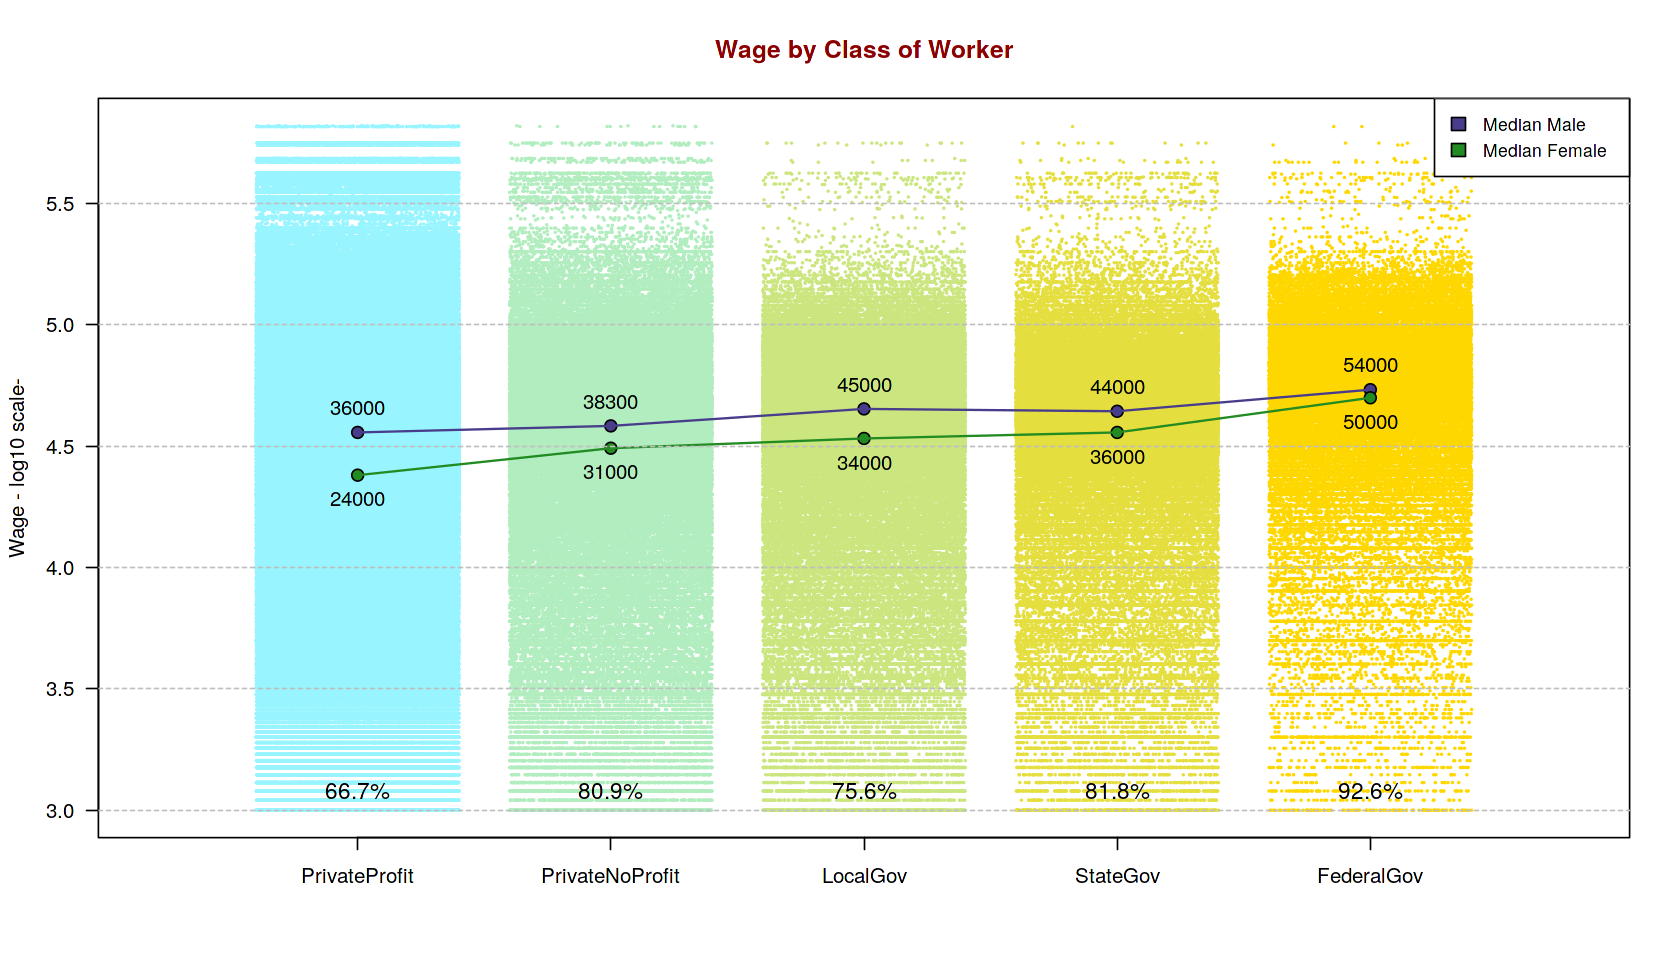

In [5]:
PopSub <- subset(PopSel, PopSel$COW >=1 & PopSel$COW < 6)
PopSub$CW <- ifelse(PopSub$COW==1, 'PrivateProfit', ifelse(PopSub$COW == 2, 'PrivateNoProfit',
ifelse (PopSub$COW == 3,'LocalGov', ifelse(PopSub$COW == 4, 'StateGov', 'FederalGov'))))

PopSub$CW <- factor(PopSub$CW, c('PrivateProfit', 'PrivateNoProfit', 'LocalGov', 'StateGov', 'FederalGov'))

WageCowMedianMen <- tapply(PopSub[PopSub$SEX==1,]$WAGP, PopSub[PopSub$SEX==1,]$CW, median)
WageCowMedianWomen <- tapply(PopSub[PopSub$SEX==2,]$WAGP, factor(PopSub[PopSub$SEX==2,]$CW), median)

options(repr.plot.width=14, repr.plot.height=8)
stripchart(log10(PopSub$WAGP) ~PopSub$CW, col=colorRampPalette(c('cadetblue1','gold'))(5),
main = 'Wage by Class of Worker', col.main='darkred', pch=19, cex=0.1, method='jitter', 
jitter=0.4, vertical=T, las=1, mar=c(20,4,4,2),
cex.axis=1, ylab='Wage - log10 scale-')

points(log10(WageCowMedianMen)  ~ seq(1,5), bg='darkslateblue', pch=21, cex=1.2)
points(log10(WageCowMedianWomen)  ~ seq(1,5), bg='forestgreen', pch=21, cex=1.2)
lines(log10(WageCowMedianMen)  ~ seq(1,5), col='darkslateblue', lwd=1.4)
lines(log10(WageCowMedianWomen)  ~ seq(1,5),col='forestgreen', lwd=1.4)
text(log10(WageCowMedianWomen)-0.1  ~ seq(1,5), label=WageCowMedianWomen)
text(log10(WageCowMedianMen)+0.1  ~ seq(1,5), label=WageCowMedianMen)
abline(h=seq(3,6,by=0.5), col='grey', lty=2)

text(rep(log10(1200), 5)  ~ seq(1,5), 
label= paste(round(WageCowMedianWomen/WageCowMedianMen*100, 1), '%', sep=''), cex=1.1)

legend("topright", legend=c("Median Male", "Median Female"), cex=0.85, 
fill=c("darkslateblue", "forestgreen"), bg="white")

## 5. Examining Wage by Gender and Ethnicity 

To evaluate the effect of ethnicity, I represent by stripchart the wage stratified by ethnical group and calculate 
median values in each group for women and men. 

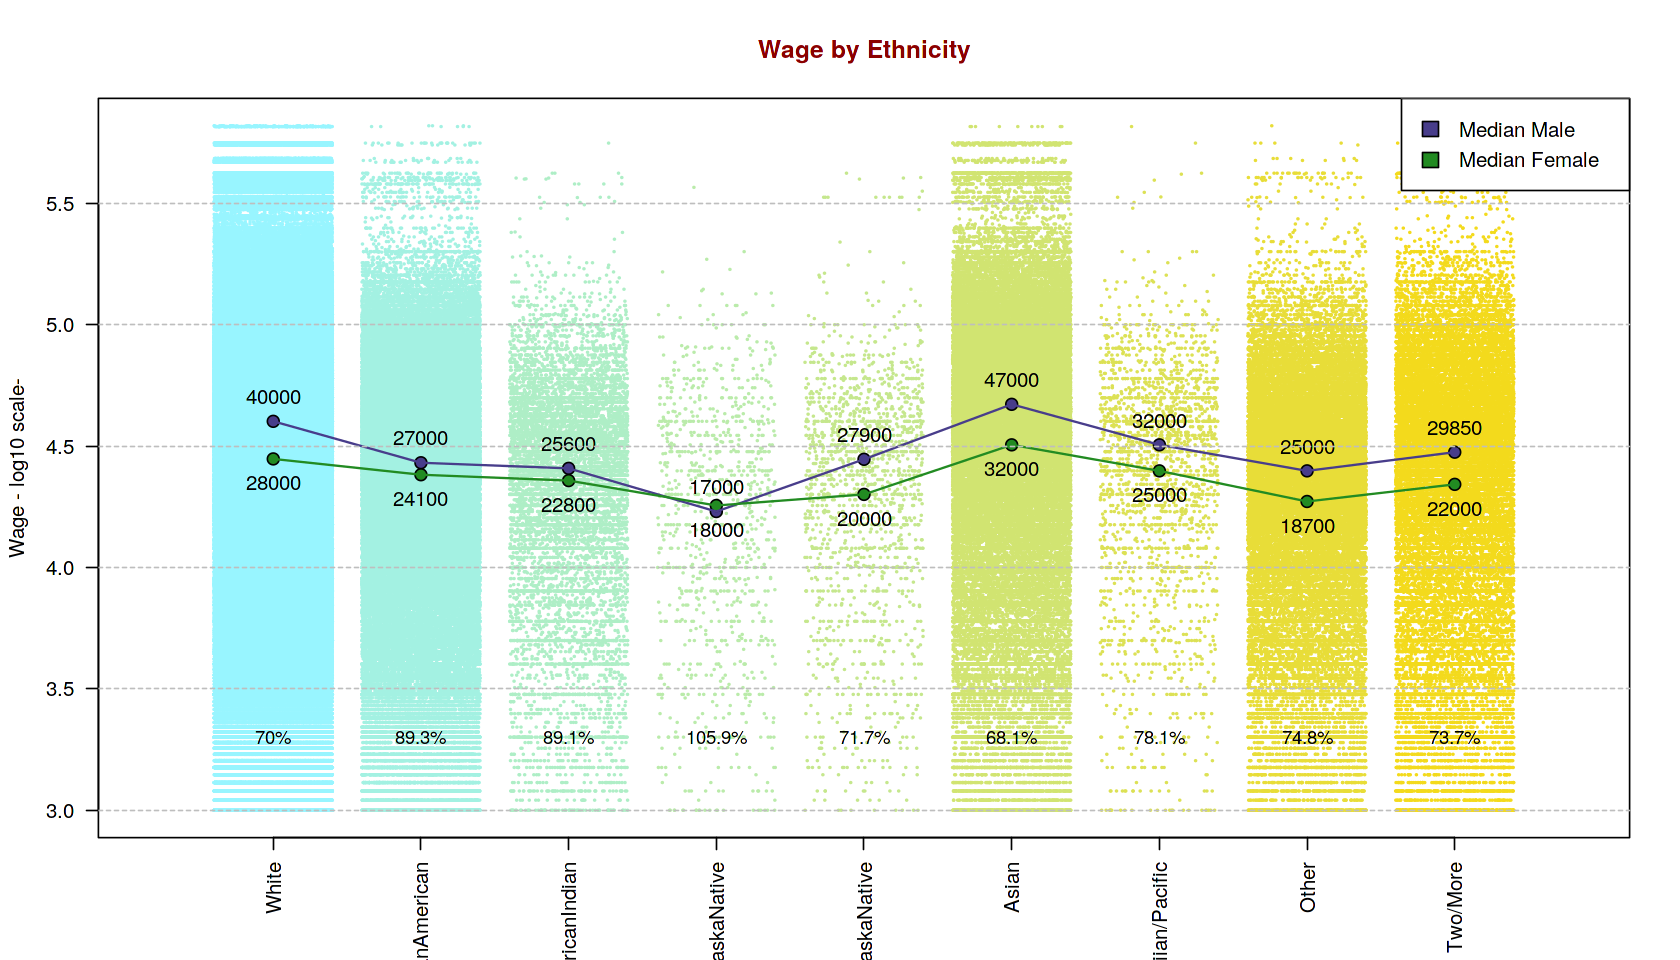

In [6]:
WageRacMedianMen <- tapply(PopSel[PopSel$SEX==1,]$WAGP, factor(PopSel[PopSel$SEX==1,]$RAC1P), median)
WageRacMedianWomen <- tapply(PopSel[PopSel$SEX==2,]$WAGP, factor(PopSel[PopSel$SEX==2,]$RAC1P), median)

stripchart(log10(PopSel$WAGP) ~PopSel$RAC1P, col=colorRampPalette(c('cadetblue1','gold'))(10),
main = 'Wage by Ethnicity', col.main='darkred', pch=19, cex=0.1, method='jitter', 
jitter=0.4, vertical=T, group.names=c('White', 'AfricanAmerican','AmericanIndian', 'AlaskaNative', 
'AmericanIndian/AlaskaNative', 'Asian', 'NativeHawaiian/Pacific', 'Other', 'Two/More'), las=2, mar=c(20,20,20,2),
cex.axis=1, ylab='Wage - log10 scale-')

points(log10(WageRacMedianMen)  ~ as.numeric(as.character(names(WageRacMedianMen))), bg='darkslateblue', 
pch=21, cex=1.2)
points(log10(WageRacMedianWomen)  ~ as.numeric(as.character(names(WageRacMedianWomen))), 
bg='forestgreen', pch=21, cex=1.2)
lines(log10(WageRacMedianMen)  ~ as.numeric(as.character(names(WageRacMedianMen))), col='darkslateblue', lwd=1.4)
lines(log10(WageRacMedianWomen)  ~ as.numeric(as.character(names(WageRacMedianWomen))),col='forestgreen', lwd=1.4)
text(log10(WageRacMedianWomen)-0.1  ~ as.numeric(as.character(names(WageRacMedianWomen))), label=WageRacMedianWomen)
text(log10(WageRacMedianMen)+0.1  ~ as.numeric(as.character(names(WageRacMedianMen))), label=WageRacMedianMen)
abline(h=seq(3,6,by=0.5), col='grey', lty=2)

text(rep(log10(2000), 9)  ~ seq(1,9), 
label= paste(round(WageRacMedianWomen/WageRacMedianMen*100, 1), '%', sep=''), cex=0.9)

legend("topright", legend=c("Median Male", "Median Female"), cex=1, 
fill=c("darkslateblue", "forestgreen"), bg="white")

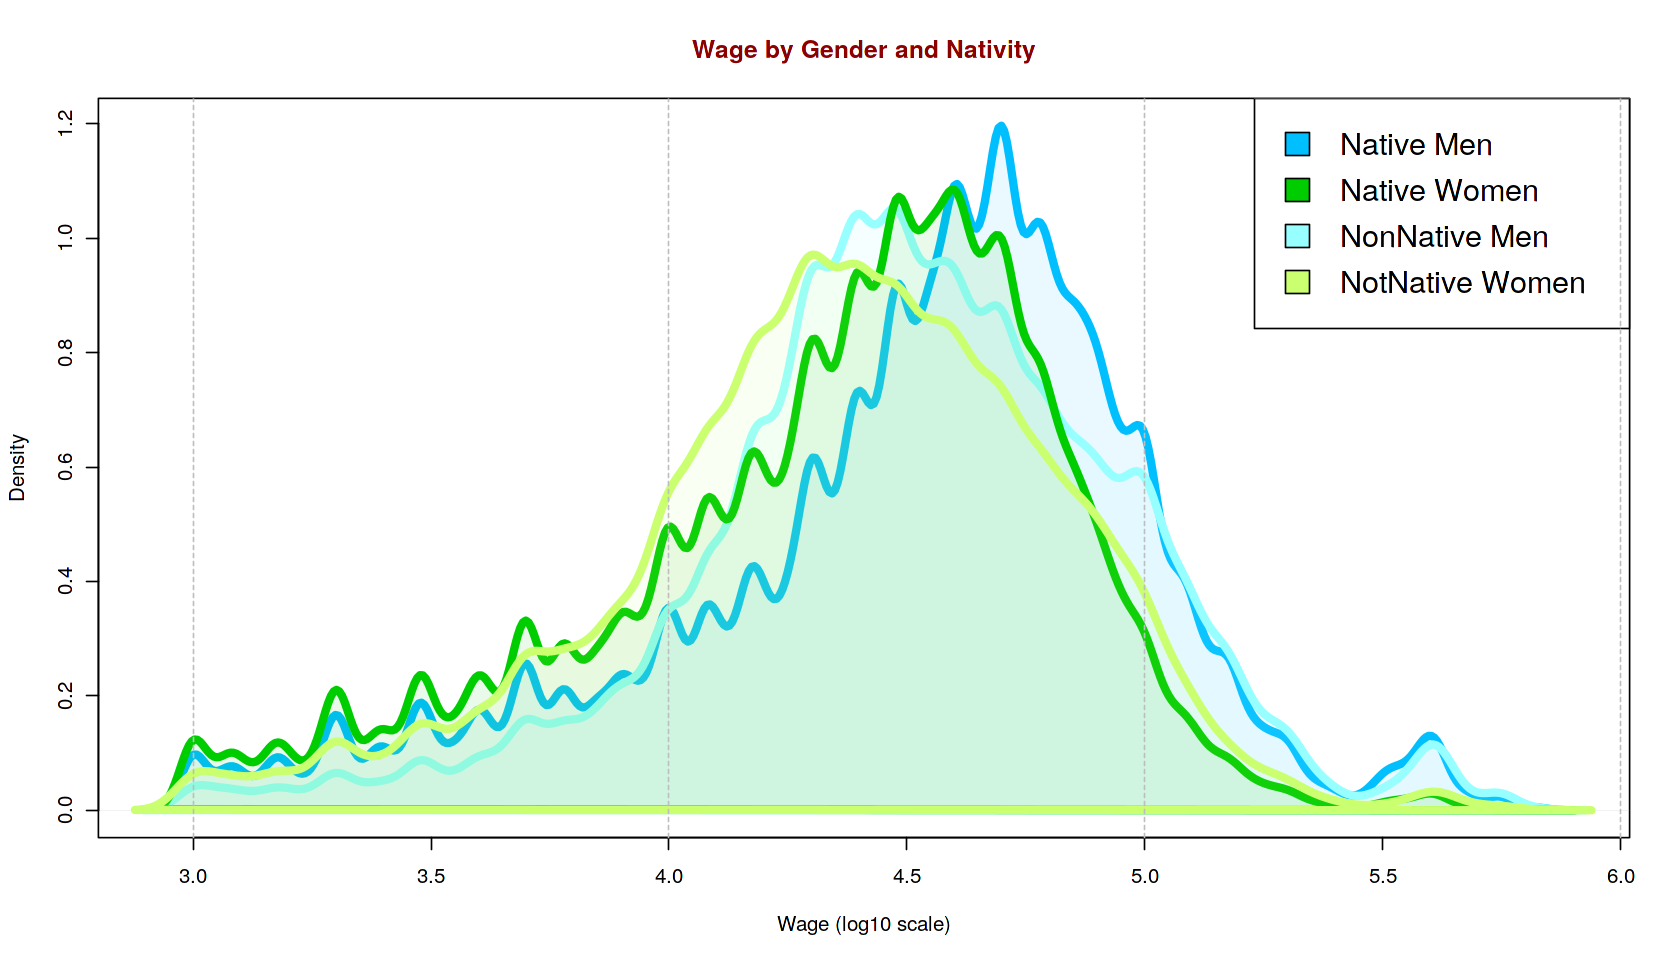

In [7]:
#To compare native and non-native people, I use overlapping density plots: 


dMaleN <- density(log10(PopSel[PopSel$SEX==1 & PopSel$NATIVITY==1,]$WAGP))
dFemaleN <- density(log10(PopSel[PopSel$SEX==2 & PopSel$NATIVITY==1,]$WAGP))
dMaleUN <- density(log10(PopSel[PopSel$SEX==1 & PopSel$NATIVITY==2,]$WAGP))
dFemaleUN <- density(log10(PopSel[PopSel$SEX==2 & PopSel$NATIVITY==2,]$WAGP))

plot(dMaleN, main='Wage by Gender and Nativity', col.main="darkred", xlab="Wage (log10 scale)")
polygon(dMaleN, col= "#00BFFF15", border="#00BFFF", lwd=5)
polygon(dMaleUN, col= "#97FFFF15", border="#97FFFF", lwd=5)
polygon(dFemaleN, col= "#00CD0015", border="#00CD00",lwd=5)
polygon(dFemaleUN, col= "#CAFF7015", border="#CAFF70",lwd=5)
legend("topright", legend=c("Native Men", "Native Women", "NonNative Men", "NotNative Women"), cex = 1.5, 
fill=c("#00BFFF", "#00CD00", "#97FFFF","#CAFF70"), bg="white")
abline(v=seq(1,6), col='grey', lty=2)

## 6. Does the gap change with age?

The wage according to age is represented in men and women by partially overlapping boxplots (light green for women, light blue for men). 
The median value in each gender is calculated and reported for each age. 


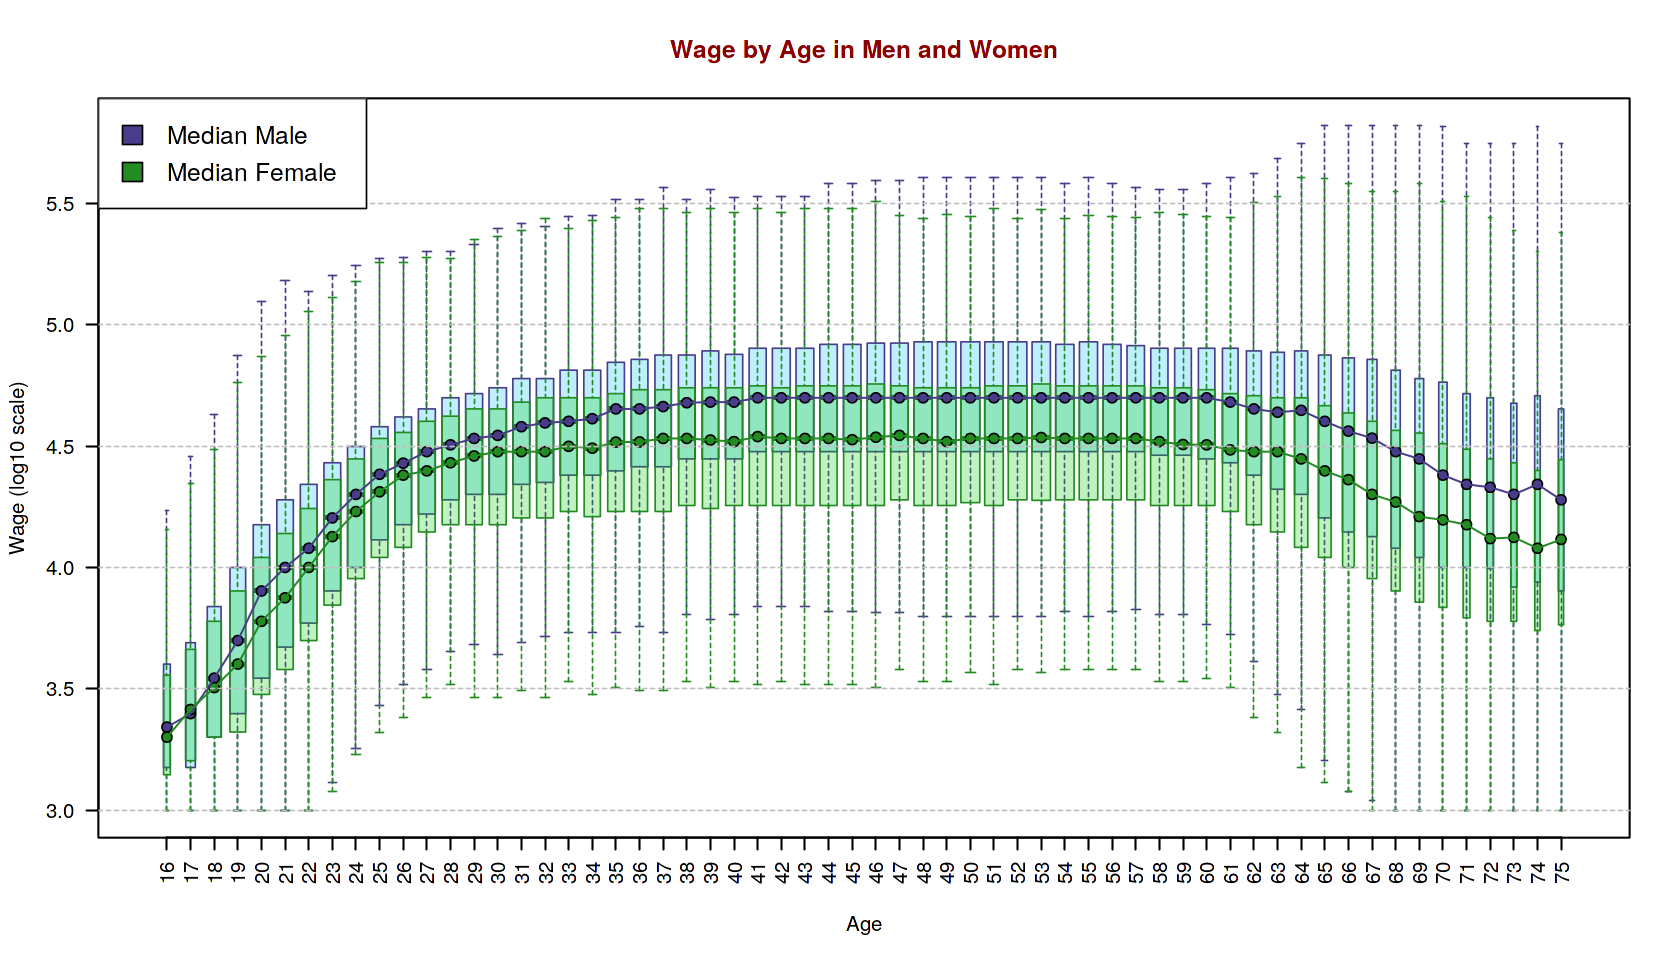

In [8]:
WageMedianMen <- tapply(PopSel[PopSel$SEX==1,]$WAGP, factor(PopSel[PopSel$SEX==1,]$AGEP), median)
WageMedianWomen <- tapply(PopSel[PopSel$SEX==2,]$WAGP, factor(PopSel[PopSel$SEX==2,]$AGEP), median)

boxplot(log10(PopSel[PopSel$SEX==1,]$WAGP) ~ PopSel[PopSel$SEX==1,]$AGEP, col="#00BFFF40", main = 'Wage by Age in Men and Women', 
col.main='darkred', xlab = 'Age', ylab= 'Wage (log10 scale)', outline=FALSE, cex.axis=1, las=2, varwidth=T, border='darkslateblue')
boxplot(log10(PopSel[PopSel$SEX==2,]$WAGP) ~ PopSel[PopSel$SEX==2,]$AGEP, col="#00CD0040",cex.axis=10^-6, add=T, xlab = NULL, ylab= NULL, outline=FALSE, 
varwidth=T, border='forestgreen')

points(log10(WageMedianMen)  ~ seq(1,60), bg='darkslateblue', pch=21, cex=1)
points(log10(WageMedianWomen)  ~ seq(1,60), bg='forestgreen', pch=21, cex=1)
lines(log10(WageMedianMen)  ~ seq(1,60), col='darkslateblue', lwd=1.2)
lines(log10(WageMedianWomen)  ~ seq(1,60),col='forestgreen', lwd=1.2)
abline(h=seq(3,6,by=0.5), col='grey', lty=2)
legend("topleft", legend=c("Median Male", "Median Female"), cex=1.2,
fill=c("darkslateblue", "forestgreen"), bg="white")